# Proyek Analisis Data: order_payments_dataset
- Nama: gustana
- Email: gustana.satiawan@gmail.com
- Id Dicoding: gustana

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: tipe pembayaran apa yang paling sering digunakan?
- pertanyaan 2: berapa banyak nilai pembayaran yang telah dilakukan berdasarkan tipe pembayaran?
- pertanyaan 3: bagaimana distribusi tipe pembayaran pada payment_installment dan payment_value?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import math

## Data Wrangling

### Gathering Data

In [2]:
# global variable
DS_PATH = '/content/order_payments_dataset.csv'

In [3]:
order_payment = pd.read_csv(DS_PATH)
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

In [4]:
data = order_payment.copy()

#### inspeksi tipe data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


> Tipe data sudah sesuai untuk seluruh kolom

#### inspeksi data duplikat

In [6]:
# inspect dupliaced value for all columns
print(data.duplicated().sum())

# inspect duplicated value for order_id
print(data.duplicated(subset=['order_id']).sum())

# inspect dupliaced value for all columns except order_id
print(data.loc[:,data.columns != 'order_id'].duplicated().sum())

0
4446
39869


Hasil inspeksi menunjukkan 2 informasi yang menarik:
- Terdapat 4,446 `order_id` duplikat pada dataset
- Terdapat 39,869 data duplikat berdasarkan seluruh kolom kecuali order_id

In [7]:
data[data.duplicated(subset=['order_id'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [8]:
data[data['order_id']=='e6a66a8350bb88497954d37688ab123e']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30
39743,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95
42000,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75
45326,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11
71825,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16
96318,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83


In [9]:
data[data['order_id']=='"31bc09fdbd701a7a4f9b55b5955b8687"']

,order_id,payment_sequential,payment_type,payment_installments,payment_value


> Kolom `order_id` mengandung banyak data duplikat.

> Akan tetapi, setelah order_id duplikat tersebut berisi nilai yang berbeda beda. Dataset ini tidak dilengkapi dengan penjelasan untuk setiap kolom, sehingga saya berasumsi kalau dataset ini merupakan kumpulan data dari tabel dengan kardinalitas m-1

> Kesimpulannya, data duplikat tersebut tidak akan saya hapus, akan tetapi saya menghapus kolom `order_id` karena tidak diperlukan dalam analisa

In [10]:
data.loc[
    data.loc[:,data.columns != 'order_id'].duplicated(),
    data.columns != '"order_id"'
]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
164,487c1451b8fd7347d0e80e5aca887e91,2,voucher,1,30.00
385,683bf306149bb869980b68d48a1bd6ab,2,voucher,1,30.00
389,adc2f0c9fd838d820339f8220c1adf08,2,voucher,1,30.00
412,af045d3e5d7082db57d5b5dde3c0c97b,1,credit_card,1,41.42
433,20aa4f85b1ed8d98e5c742c1a003db9c,2,voucher,1,50.00
...,...,...,...,...,...
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [11]:
data.loc[
    (data['payment_sequential'] == 2) &
    (data['payment_type'] == 'voucher') &
    (data['payment_installments'] == 1) &
    (data['payment_value'] == 30.00)
].head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
139,82ffe097d8ddbf319a523b9bbe7725d5,2,voucher,1,30.0
164,487c1451b8fd7347d0e80e5aca887e91,2,voucher,1,30.0
385,683bf306149bb869980b68d48a1bd6ab,2,voucher,1,30.0
389,adc2f0c9fd838d820339f8220c1adf08,2,voucher,1,30.0
3566,b0f445cca9b6a54ff47e8834c16ba6c1,2,voucher,1,30.0
5829,3b056e92067a43aaa660bc71598dc68e,2,voucher,1,30.0
8140,5798e78e71a22ca63000082377a15073,2,voucher,1,30.0
8214,92907309dff7adcd19bbbb29d5fda792,2,voucher,1,30.0
9402,b5d4eb6b98c48a1d20e7a7663881bdd0,2,voucher,1,30.0
10855,9b81934297f0b5aab6474d8eb7fb2b4e,2,voucher,1,30.0


In [12]:
data.duplicated().sum()

0

> Hasil inspeksi menunjukkan terdapat 39,869 data duplikat untuk seluruh kolom kecuali order_id

> Setelah diperiksa lebih lanjut, 39,869 data duplikat tersebut berasal dari order_id yang berbeda.

> Kesimpulan yang saya ambil adalah 39,869 data duplikat tersebut terjadi dengan alami, bukan karena kesalahan sistem maupun manusia. Sehingga, tidak akan saya lakukan penghapusan.

#### inspeksi data null

In [13]:
data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Cleaning Data

#### menghapus kolom yang tidak diperlukan

In [14]:
# the order_id column is unused because it doesn't represent anything for the analysis

data = data.drop(columns=['order_id'])
data.head()

,payment_sequential,payment_type,payment_installments,payment_value
0,1,credit_card,8,99.33
1,1,credit_card,1,24.39
2,1,credit_card,1,65.71
3,1,credit_card,8,107.78
4,1,credit_card,2,128.45


## Exploratory Data Analysis (EDA)

In [15]:
OBSERVATION_NUM = data['payment_type'].describe()['count']

### data distribution

In [16]:
data.describe(include='all')

,payment_sequential,payment_type,payment_installments,payment_value
count,103886.000000,103886,103886.000000,103886.000000
unique,NaN,5,NaN,NaN
top,NaN,credit_card,NaN,NaN
freq,NaN,76795,NaN,NaN
mean,1.092679,NaN,2.853349,154.100380
std,0.706584,NaN,2.687051,217.494064
min,1.000000,NaN,0.000000,0.000000
25%,1.000000,NaN,1.000000,56.790000
50%,1.000000,NaN,1.000000,100.000000
75%,1.000000,NaN,4.000000,171.837500


Tabel analisa deskriptif di atas menunjukkan beberapa informasi penting:
- payment sequential (numerical discrete):
  - jangkauan nilai 1 - 29
  - rata-rata = 1.09 dan median = 1, menunjukkan bahwa distribusi data `positive skewed`

- payment type (category nominal):
  - Terdapat 5 jenis kategori dan jenis pembayaran yang paling sering digunakan adalah `credit_card` sebesar ~74.0%.
  
- payment installment (numerical discrete):
  - jangkauan nilai 1 - 24
  - rata-rata = 2.85 dan median = 1, menunjukkan distribusi data `positive skewed`

- payment value (numerical continue):
  - jangkauan nilai 0 - ~13,664
  - rata-rata = ~154 dan median = 100, menunjukkan bahwa distribusi data `positive skewed`

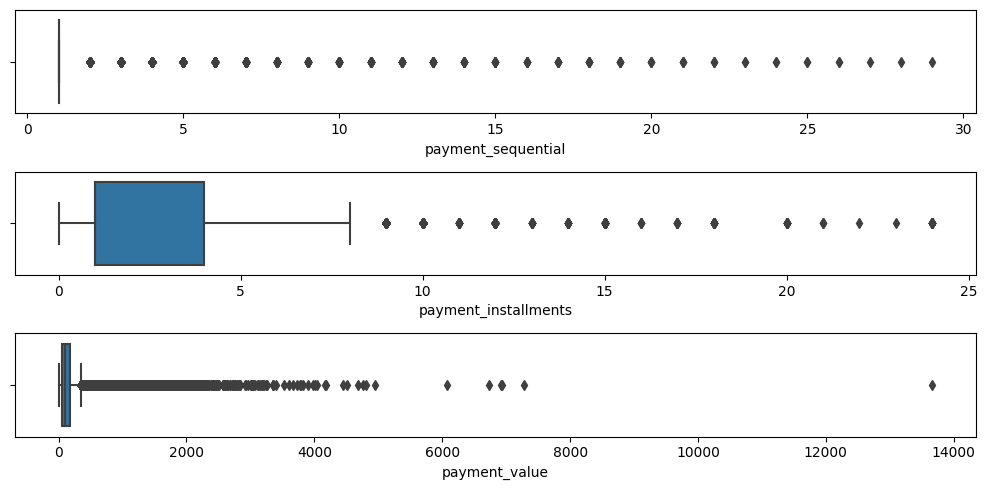

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

sns.boxplot(
    x=data['payment_sequential'],
    ax=axs[0]
)

sns.boxplot(
    x=data['payment_installments'],
    ax=axs[1]
)

sns.boxplot(
    x=data['payment_value'],
    ax=axs[2]
)

plt.tight_layout()
plt.show()

> Boxplot juga menunjukkan ketiga kolom tersebut berisi nilai dengan distribusi `positive skewed`

### data correlation

In [18]:
data.corr(numeric_only=True)

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


> Tabel korelasi menunjukkan tidak ada korelasi yang signifikan antar kolom, akan tetapi terdapat korelasi lemah positif antar payment_installment dan payment_value sebesar 0.33

### data grouping by `payment type`

In [19]:
data.groupby('payment_type').agg(
    payment_sequential_mean = pd.NamedAgg(column='payment_sequential',
                                           aggfunc='mean'),
    payment_installment_mean = pd.NamedAgg(column='payment_installments',
                                            aggfunc='mean'),
    payment_value_mean = pd.NamedAgg(column='payment_value',
                                      aggfunc='mean'),
    payment_value_highest = pd.NamedAgg(column='payment_value',
                                      aggfunc='max'),
    freq = pd.NamedAgg(column='payment_value',
                       aggfunc='count')
).sort_values(by=['payment_value_mean'], ascending=False)

,payment_sequential_mean,payment_installment_mean,payment_value_mean,payment_value_highest,freq
payment_type,,,,,
credit_card,1.004167,3.507155,163.319021,13664.08,76795
boleto,1.000051,1.000000,145.034435,7274.88,19784
debit_card,1.034663,1.000000,142.570170,4445.50,1529
voucher,2.602424,1.000000,65.703354,3184.34,5775
not_defined,1.000000,1.000000,0.000000,0.00,3


> Tabel agregasi di atas juga menunjukkan bahwa credit card merupakan kontributor tertinggi pada total pembayaran (payment value)



## Visualization & Explanatory Analysis

### Pertanyaan 1: tipe pembayaran apa yang paling sering digunakan?

In [20]:
payment_type_freq = data[['payment_type']].groupby('payment_type').value_counts().to_frame(name='freq').sort_values(by=['freq'], ascending=False)

In [21]:
payment_type_freq

,freq
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


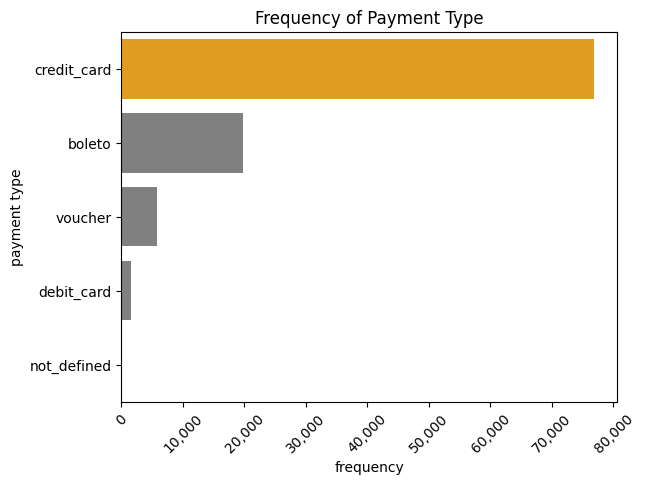

In [22]:
col_colors = ['grey' if(freq < max(payment_type_freq['freq'])) else 'orange' for freq in payment_type_freq['freq']]

ax = sns.barplot(
    data=payment_type_freq,
    x='freq',
    y=payment_type_freq.index,
    orient='h',
    palette=col_colors)

ax.set(
    title='Frequency of Payment Type',
    xlabel='frequency',
    ylabel='payment type'
)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

> Credit card merupakan jenis pembayaran yang paling sering digunakan sebesar 70%.

### Pertanyaan 2: berapa banyak nilai pembayaran yang telah dilakukan berdasarkan tipe pembayaran?

In [23]:
payment_sum_by_type = data.groupby('payment_type').agg(
    payment_sum = pd.NamedAgg(column='payment_value',
                              aggfunc='sum')
).sort_values(by=['payment_sum'], ascending=False)

In [24]:
payment_sum_by_type

,payment_sum
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [25]:
payment_sum_by_type.sum()['payment_sum']

16008872.119999997

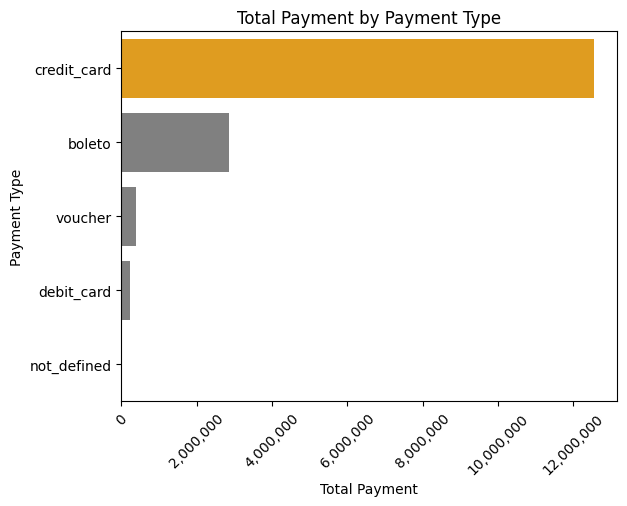

In [26]:
col_colors = ['gray' if(sum < max(payment_sum_by_type['payment_sum'])) else 'orange' for sum in payment_sum_by_type['payment_sum']]

ax = sns.barplot(data=payment_sum_by_type,
                 x='payment_sum',
                 y=payment_sum_by_type.index,
                 palette=col_colors)

ax.set(
    title='Total Payment by Payment Type',
    xlabel='Total Payment',
    ylabel='Payment Type'
)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

- Kredit lebih dari 12 juta (78% dari total pembayaran)
- Boleto: 2,869,361
- Voucher: 379,436
- Debit: 217,989
- Undefined: 0


### Pertanyaan 3: bagaimana distribusi tipe pembayaran pada payment_installment dan payment_value?

In [27]:
installment_and_value_by_type = data.loc[:, ['payment_installments', 'payment_value', 'payment_type']]

In [28]:
installment_and_value_by_type

,payment_installments,payment_value,payment_type
0,8,99.33,credit_card
1,1,24.39,credit_card
2,1,65.71,credit_card
3,8,107.78,credit_card
4,2,128.45,credit_card
...,...,...,...
103881,1,363.31,boleto
103882,2,96.80,credit_card
103883,1,47.77,credit_card
103884,5,369.54,credit_card


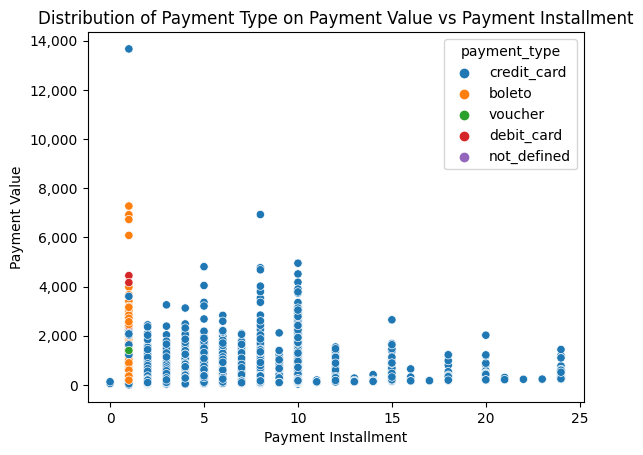

In [29]:
ax = sns.scatterplot(
    data=installment_and_value_by_type,
    x='payment_installments',
    y='payment_value',
    hue='payment_type'
)

ax.set(
    title='Distribution of Payment Type on Payment Value vs Payment Installment',
    xlabel='Payment Installment',
    ylabel='Payment Value'
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

Plot di atas memberikan beberapa informasi yang menarik:
- Distribusi pembayaran dengan credit card condong kanan (positive skewed) dengan jangkauan distribusi nilai payment installment dari 0 sampain 24.

- Terdapat nilai extreme pada nilai payment value dengan 1 kali pembayaran dengan nilai payment 14,000

- Tipe pembayaran lain berkumpul pada installment = 1. Dari ke-4 kategori ini, buleto menjadi tipe pembayaran dengan beberapa transaksi dengan rentang nilai pembayaran 6,000 - 7,800

## Conclusion

- Conclution pertanyaan 1: Kredit merupakan tipe pembayaran yang paling sering digunakan dengan nilai 70% dari frequensi transaksi.

- Conclution pertanyaan 2:
  - Kredit lebih dari 12 juta (78% dari total pembayaran)
  - Boleto: 2,869,361
  - Voucher: 379,436
  - Debit: 217,989
  - Undefined: 0


- Conclution pertanyaan 3:
  - Distribusi pembayaran dengan credit card condong kanan (positive skewed) dengan jangkauan distribusi nilai payment installment dari 0 sampain 24.

  - Terdapat nilai extreme pada nilai payment value dengan 1 kali pembayaran dengan nilai payment 14,000

  - Tipe pembayaran lain berkumpul pada installment = 1. Dari ke-4 kategori ini, buleto menjadi tipe pembayaran dengan beberapa transaksi dengan rentang nilai pembayaran 6,000 - 7,800